In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install Sastrawi

In [ ]:
import nltk
import re
import string
import contractions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from IPython.display import display

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Baca file CSV
df_comments = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')
display(df_comments)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...


Sentiment
negative    200
positive    200
Name: count, dtype: int64


<ipython-input-27-08e6268b2a40>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_comments, palette={'negative': 'red', 'positive': 'blue'})


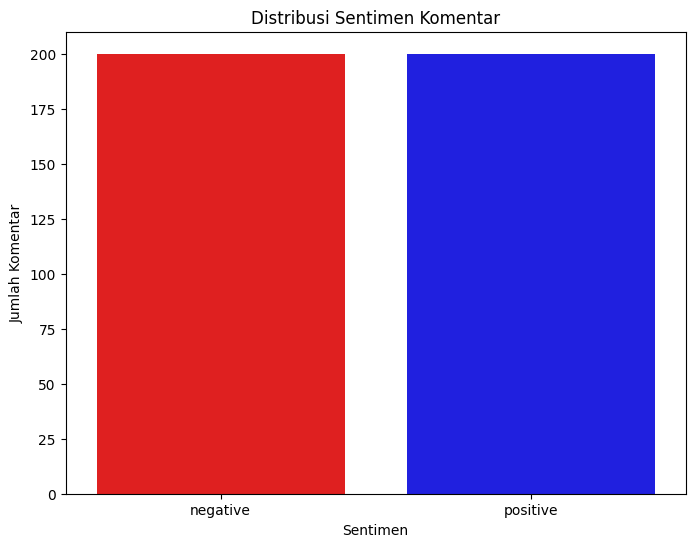

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung distribusi sentimen
sentiment_counts = df_comments['Sentiment'].value_counts()
print(sentiment_counts)

# Membuat bar plot untuk distribusi sentimen dengan warna yang disesuaikan
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df_comments, palette={'negative': 'red', 'positive': 'blue'})
plt.title('Distribusi Sentimen Komentar')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Komentar')
plt.show()

# Bag of Words

### Pre-Processing & Tokenization

1. Lowering Case & Removing Punctuation

In [ ]:
import pandas as pd
import re
import string
from textblob import TextBlob

def clean_comments(comments):
    def remove_punctuation(text):
        tanda_baca = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in tanda_baca)

    comments = comments.lower()
    comments = re.sub(r'\\u\w\w\w\w', '', comments)
    comments = re.sub(r'http\S+', '', comments)
    comments = re.sub('@[^\s]+', '', comments)
    comments = re.sub('<[^\s]+', '', comments)
    comments = re.sub('#[^\s]+', '', comments)
    comments = re.sub(r'#([^\s]+)', r'\1', comments)
    comments = remove_punctuation(comments)
    comments = re.sub(r'\w*\d\w*', '', comments).strip()
    return comments

# Terapkan pembersihan teks pada kolom "Instagram Comment Text"
df_comments['clean'] = df_comments['Instagram Comment Text'].apply(clean_comments)
df_comments.head()

,Id,Sentiment,Instagram Comment Text,clean
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,tolol gak ada hubungan nya keguguran dgn pake ...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt balikanhadewwntar diti...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn skr lengket lg duhhh kok labil bgt sih m...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesel dengan att nya gausah ke a...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lgsakit jiwaknp harus d...


2. Tokenization

In [ ]:
# Fungsi untuk tokenisasi teks
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Tokenisasi teks yang telah dibersihkan
df_comments['tokenized'] = df_comments['clean'].apply(tokenize_text)
df_comments.head()

,Id,Sentiment,Instagram Comment Text,clean,tokenized
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,tolol gak ada hubungan nya keguguran dgn pake ...,"[tolol, gak, ada, hubungan, nya, keguguran, dg..."
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt balikanhadewwntar diti...,"[geblek, lo, tatacowo, bgt, balikanhadewwntar,..."
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn skr lengket lg duhhh kok labil bgt sih m...,"[kmrn, skr, lengket, lg, duhhh, kok, labil, bg..."
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesel dengan att nya gausah ke a...,"[intinya, kalau, kesel, dengan, att, nya, gaus..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lgsakit jiwaknp harus d...,"[hadewwwww, permpuan, itu, lgsakit, jiwaknp, h..."


3. Removing Stopwords

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Definisikan set kata-kata penghenti bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Asumsikan df_comments sudah ada dan memiliki kolom 'tokenized' yang berisi list token
df_comments['removing_stopwords'] = df_comments['tokenized'].apply(lambda tokens: remove_stopwords(tokens) if isinstance(tokens, list) else '')
df_comments.head()

,Id,Sentiment,Instagram Comment Text,clean,tokenized,removing_stopwords
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,tolol gak ada hubungan nya keguguran dgn pake ...,"[tolol, gak, ada, hubungan, nya, keguguran, dg...",tolol gak hubungan nya keguguran dgn pake hija...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt balikanhadewwntar diti...,"[geblek, lo, tatacowo, bgt, balikanhadewwntar,...",geblek lo tatacowo bgt balikanhadewwntar ditin...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn skr lengket lg duhhh kok labil bgt sih m...,"[kmrn, skr, lengket, lg, duhhh, kok, labil, bg...",kmrn skr lengket lg duhhh labil bgt sih mbak k...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesel dengan att nya gausah ke a...,"[intinya, kalau, kesel, dengan, att, nya, gaus...",intinya kesel att nya gausah anaknya kasian pe...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lgsakit jiwaknp harus d...,"[hadewwwww, permpuan, itu, lgsakit, jiwaknp, h...",hadewwwww permpuan lgsakit jiwaknp yg jd peran...


4. Stemming & Lemmatization

In [ ]:
def preprocess_text(text):
    # Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_text = stemmer.stem(text)

    # Lemmatisasi
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(stemmed_text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)

    return lemmatized_text

df_comments['stem&lem_text'] = df_comments['removing_stopwords'].apply(preprocess_text)
df_comments.head()

,Id,Sentiment,Instagram Comment Text,clean,tokenized,removing_stopwords,stem&lem_text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,tolol gak ada hubungan nya keguguran dgn pake ...,"[tolol, gak, ada, hubungan, nya, keguguran, dg...",tolol gak hubungan nya keguguran dgn pake hija...,tolol gak hubung nya gugur dgn pake hijab syar...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt balikanhadewwntar diti...,"[geblek, lo, tatacowo, bgt, balikanhadewwntar,...",geblek lo tatacowo bgt balikanhadewwntar ditin...,geblek lo tatacowo bgt balikanhadewwntar tingg...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn skr lengket lg duhhh kok labil bgt sih m...,"[kmrn, skr, lengket, lg, duhhh, kok, labil, bg...",kmrn skr lengket lg duhhh labil bgt sih mbak k...,kmrn skr lengket lg duhhh labil bgt sih mbak k...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesel dengan att nya gausah ke a...,"[intinya, kalau, kesel, dengan, att, nya, gaus...",intinya kesel att nya gausah anaknya kasian pe...,inti kesel att nya gausah anak kasi kembang ps...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lgsakit jiwaknp harus d...,"[hadewwwww, permpuan, itu, lgsakit, jiwaknp, h...",hadewwwww permpuan lgsakit jiwaknp yg jd peran...,hadewwwww permpuan lgsakit jiwaknp yg jd peran...


5. Handling Contraction

In [ ]:
# Kamus kontraksi sederhana
contraction_mapping = {
    "sapa": "siapa",
    "dhl": "padahal",
    "jgn": "jangan",
    "udh": "udah",
    "dpt": "dapat",
    "bbrp": "beberapa",
    "sllu": "selalu",
    "kpd": "kepada",
    "tdk": "tidak",
    "yg": "yang",
    " dgn ": " dengan ",
    " ga ": "tidak",
    "kmrn": "kemarin",
    " lg ": " lagi ",
    "lgsakit": " lagi sakit ",
    "jiwaknp": " jiwa kenapa ",
    "hadewwwww": "aduh",
    "ato": "atau",
    "markotoppp": "mantap",
    "skr": "sekarang",
    " gausah ": " tidak usah ",
    "skrg": "sekarang",
    " gaakan ": "tidak akan",
    " tau ": "tahu",
    "balajaer": "belajar",
    "pd": "pada",
    "Sdh": "Sudah",
    "pny": "punya",
    "bgt": "banget",
    "balikanhadewwntar ": "balikan aduh nanti ",
    " gak ": " tidak ",
    " duhhh ": " aduh ",
    "jd": "jadi",
    "tolol": "bodoh",
    "geblek": "bodoh",
    "cowo": " cowok ",
    "duhhh": "aduh",
    "labil": "bimbang",
    "permpuan": "perempuan",
    "pake": "pakai",
    " lo ": " kamu ",
    "syar": "syari",
    "woyyyy": "hey",
    "singkron": "sinkron",
    " dalem ": " dalam ",
    "kesel": "kesal"
}

# Fungsi untuk mengganti kontraksi dalam teks
def expand_contractions(text, contraction_mapping):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0).lower()  # Mengubah ke huruf kecil
        expanded_contraction = contraction_mapping.get(match)
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

# Menangani kontraksi dalam kolom teks
df_comments['expanded_text'] = df_comments['stem&lem_text'].apply(lambda x: expand_contractions(x, contraction_mapping))
df_comments.to_csv("text_preprocess.csv")
df_comments.head()

,Id,Sentiment,Instagram Comment Text,clean,tokenized,removing_stopwords,stem&lem_text,expanded_text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,tolol gak ada hubungan nya keguguran dgn pake ...,"[tolol, gak, ada, hubungan, nya, keguguran, dg...",tolol gak hubungan nya keguguran dgn pake hija...,tolol gak hubung nya gugur dgn pake hijab syar...,bodoh tidak hubung nya gugur dengan pakai hija...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt balikanhadewwntar diti...,"[geblek, lo, tatacowo, bgt, balikanhadewwntar,...",geblek lo tatacowo bgt balikanhadewwntar ditin...,geblek lo tatacowo bgt balikanhadewwntar tingg...,bodoh kamu tata cowok banget balikan aduh nan...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn skr lengket lg duhhh kok labil bgt sih m...,"[kmrn, skr, lengket, lg, duhhh, kok, labil, bg...",kmrn skr lengket lg duhhh labil bgt sih mbak k...,kmrn skr lengket lg duhhh labil bgt sih mbak k...,kemarin sekarang lengket lagi aduh bimbang ban...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesel dengan att nya gausah ke a...,"[intinya, kalau, kesel, dengan, att, nya, gaus...",intinya kesel att nya gausah anaknya kasian pe...,inti kesel att nya gausah anak kasi kembang ps...,inti kesal att nya tidak usah anak kasi kemban...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lgsakit jiwaknp harus d...,"[hadewwwww, permpuan, itu, lgsakit, jiwaknp, h...",hadewwwww permpuan lgsakit jiwaknp yg jd peran...,hadewwwww permpuan lgsakit jiwaknp yg jd peran...,aduh perempuan lagi sakit jiwa kenapa yang...


### Building Vocabulary & Vectorisasi

In [ ]:
# Membaca file CSV yang berisi teks yang telah diproses sebelumnya
df = pd.read_csv('text_preprocess.csv')

# Mengambil kolom 'Instagram Comment Text'
text_comments = df['expanded_text']

# Inisialisasi list untuk menyimpan semua kata
all_words = []

# Tokenisasi setiap teks comments dan konversi ke huruf kecil
for text_comment in text_comments:
    tokens = word_tokenize(text_comment.lower())
    all_words.extend(tokens)

# Membuat vocab atau kosa kata
vocab = Counter(all_words)

# Membuat DataFrame dari vocab
df_vocab = pd.DataFrame.from_dict(vocab, orient='index', columns=['Frequency'])

# Menambahkan kolom untuk kata
df_vocab.index.name = 'Kata'

# Menampilkan DataFrame vocab
print("Vocab atau kosa kata beserta frekuensinya:")
df_vocab.head()

Vocab atau kosa kata beserta frekuensinya:


,Frequency
Kata,
bodoh,17
tidak,66
hubung,3
nya,85
gugur,1


### 2 Grams

In [ ]:
from nltk.util import ngrams

# Fungsi untuk menghasilkan n-grams dari teks
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Inisialisasi list untuk menyimpan semua n-grams
all_2grams = []

# Melakukan tokenisasi dan pembuatan n-grams untuk setiap teks tweet
for text_comment in text_comments:
    tokens = word_tokenize(text_comment.lower())

    # Menghasilkan 2-grams
    two_grams = generate_ngrams(tokens, 2)
    all_2grams.extend(two_grams)

# Membuat Counter untuk menghitung frekuensi masing-masing n-grams
counter_2grams = Counter(all_2grams)

# Membuat DataFrame untuk n-grams
df_2grams = pd.DataFrame.from_dict(counter_2grams, orient='index', columns=['Frequency'])
df_2grams.index = df_2grams.index.map(lambda x: ' '.join(x))
df_2grams.index.name = '2-grams'

# Menampilkan DataFrame n-grams
print("2-grams:")
display(df_2grams.head(10))

# Menyimpan DataFrame 2-grams ke dalam file CSV
df_2grams.to_csv('2grams.csv')

2-grams:


,Frequency
2-grams,
bodoh tidak,2
tidak hubung,1
hubung nya,2
nya gugur,1
gugur dengan,1
dengan pakai,1
pakai hijab,2
hijab syari,1
syari yang,1


### 3 Grams

In [ ]:
# Fungsi untuk menghasilkan n-grams dari teks
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Inisialisasi list untuk menyimpan semua n-grams
all_3grams = []

# Melakukan tokenisasi dan pembuatan n-grams untuk setiap teks tweet
for text_comment in text_comments:
    tokens = word_tokenize(text_comment.lower())

    # Menghasilkan 3-grams
    three_grams = generate_ngrams(tokens, 3)
    all_3grams.extend(three_grams)

# Membuat Counter untuk menghitung frekuensi masing-masing n-grams
counter_3grams = Counter(all_3grams)

# Membuat DataFrame untuk n-grams
df_3grams = pd.DataFrame.from_dict(counter_3grams, orient='index', columns=['Frequency'])
df_3grams.index = df_3grams.index.map(lambda x: ' '.join(x))
df_3grams.index.name = '3-grams'

# Menampilkan DataFrame n-grams
print("\n3-grams:")
display(df_3grams.head(10))

# Menyimpan DataFrame 3-grams ke dalam file CSV
df_3grams.to_csv('3grams.csv')


3-grams:


,Frequency
3-grams,
bodoh tidak hubung,1
tidak hubung nya,1
hubung nya gugur,1
nya gugur dengan,1
gugur dengan pakai,1
dengan pakai hijab,1
pakai hijab syari,1
hijab syari yang,1
syari yang kamu,1


# TF-IDF

### TF(Calculate the Term Frequency)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display

# Membaca data dari file CSV
df = pd.read_csv('text_preprocess.csv')

# Memuat kolom teks
corpus = df['expanded_text'].tolist()

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Melakukan pembelajaran vektor pada corpus
X = vectorizer.fit_transform(corpus)

# Mendapatkan daftar fitur
feature_names = vectorizer.get_feature_names_out()

# Mengonversi hasil ke dalam bentuk DataFrame
tf_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Menampilkan hasil menggunakan display()
print("Term Frequency Matrix:")
display(tf_df)

output_excel_file = 'table_TF(Calculate the Term Frequency).xlsx'
tf_df.to_excel(output_excel_file, index=False)

Term Frequency Matrix:


,aamiin,aammiinnn,abal,abang,abbey,abege,abiiis,abis,abiss,abu,...,yoo,you,youtube,yra,yuk,yutub,zaman,zholimi,zina,zzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Compute IDF (Inverse Document Frequency)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import display

# Baca data dari CSV
data = pd.read_csv('text_preprocess.csv')

# Menghitung IDF menggunakan TfidfVectorizer dari scikit-learn dengan pola token hanya kata-kata
tfidf_vectorizer = TfidfVectorizer(use_idf=True, token_pattern=r'\b\w+\b')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['expanded_text'])

# Mengambil nama fitur (term) dan IDF-nya dari TfidfVectorizer
terms = tfidf_vectorizer.get_feature_names_out()
idf_values = tfidf_vectorizer.idf_

# Membuat DataFrame untuk hasil IDF menggunakan scikit-learn
idf_df = pd.DataFrame({'Term': terms, 'IDF': idf_values})

# Menghitung document frequency (df) sebagai bilangan bulat
doc_freq = np.bincount(tfidf_matrix.indices, minlength=tfidf_matrix.shape[1])
# Menambahkan kolom document frequency (df) ke DataFrame
idf_df['DF'] = doc_freq

# Menambahkan kolom untuk rumus IDF sebagai bilangan bulat
idf_df['Rumus IDF (Bilangan Bulat)'] = idf_df['DF'].apply(lambda x: f"log({data.shape[0]}/{x})")

# Menampilkan tabel IDF dari scikit-learn
print("Tabel IDF dari scikit-learn:")
display(idf_df)

# Simpan tabel IDF ke file CSV
idf_df.to_csv('idf_table_sklearn.csv', index=False)

output_excel_file = 'table_Compute IDF (Inverse Document Frequency).xlsx'
idf_df.to_excel(output_excel_file, index=False)

Tabel IDF dari scikit-learn:


,Term,IDF,DF,Rumus IDF (Bilangan Bulat)
0,a,5.607667,3,log(400/3)
1,aamiin,5.895349,2,log(400/2)
2,aammiinnn,6.300814,1,log(400/1)
3,abal,5.895349,2,log(400/2)
4,abang,5.895349,2,log(400/2)
...,...,...,...,...
2580,yutub,6.300814,1,log(400/1)
2581,zaman,5.607667,3,log(400/3)
2582,zholimi,6.300814,1,log(400/1)
2583,zina,6.300814,1,log(400/1)


### Compute TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import display

# Read data from CSV
idf_df = pd.read_csv('text_preprocess.csv')

# Calculate TF-IDF using TfidfVectorizer from scikit-learn
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(idf_df['expanded_text'])

# Get feature names (terms) and IDF values from TfidfVectorizer
terms = tfidf_vectorizer.get_feature_names_out()
idf_values = tfidf_vectorizer.idf_

# Create a DataFrame for IDF results using scikit-learn
idf_sklearn_df = pd.DataFrame({'Term': terms, 'TF': tfidf_matrix.sum(axis=0).A1, 'IDF': idf_values})

# Calculate average TF-IDF per term
avg_tfidf_values = tfidf_matrix.mean(axis=0).A1  # Convert to 1D array
idf_sklearn_df['TF-IDF'] = avg_tfidf_values  # Add TF-IDF column to DataFrame

# Display TF-IDF table with corrected order
print("Tabel TF-IDF:")
display(idf_sklearn_df[['Term', 'TF', 'IDF', 'TF-IDF']])

# Save TF-IDF table to CSV file
idf_sklearn_df.to_csv('tfidf_table_sklearn.csv', index=False)

output_excel_file = 'table_Compute TF-IDF.xlsx'
idf_sklearn_df.to_excel(output_excel_file, index=False)

Tabel TF-IDF:


,Term,TF,IDF,TF-IDF
0,aamiin,0.651159,5.895349,0.001628
1,aammiinnn,0.241964,6.300814,0.000605
2,abal,0.892536,5.895349,0.002231
3,abang,0.579166,5.895349,0.001448
4,abbey,0.449406,6.300814,0.001124
...,...,...,...,...
2565,yutub,0.190014,6.300814,0.000475
2566,zaman,0.649568,5.607667,0.001624
2567,zholimi,0.214816,6.300814,0.000537
2568,zina,0.356791,6.300814,0.000892


# Klasifikasi Algorithma

## Naive Bayes

Naive Bayes menggunakan TF-IDF

Evaluasi Model yang telah dioptimasi menggunakan Data Uji:
              precision    recall  f1-score   support

    negative       0.97      0.86      0.92        44
    positive       0.85      0.97      0.91        36

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80

Akurasi: 0.9125


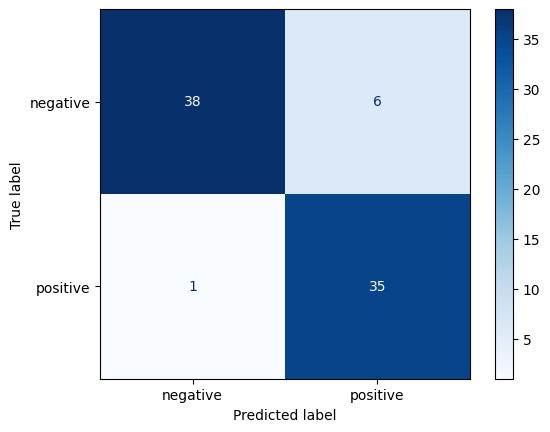

Skor Akurasi untuk Setiap Lipatan Cross-Validation:
[0.8375 0.9125 0.8    0.875  0.8   ]
Rata-rata Skor Akurasi: 0.845


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv("text_preprocess.csv")

# Inisialisasi fitur X dan label y
X = df['expanded_text']
y = df['Sentiment']

# Ekstraksi Fitur menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Penanganan Ketidakseimbangan Kelas menggunakan Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_tfidf, y)

# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Pelatihan Model Naive Bayes dengan Hyperparameter Tuning menggunakan GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Hyperparameter untuk smoothing
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluasi Model yang telah dioptimasi menggunakan Data Uji
y_pred_best = best_model.predict(X_test)
print("Evaluasi Model yang telah dioptimasi menggunakan Data Uji:")
print(classification_report(y_test, y_pred_best))
print("Akurasi:", accuracy_score(y_test, y_pred_best))

# Menampilkan Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Evaluasi Model menggunakan Cross-Validation
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Skor Akurasi untuk Setiap Lipatan Cross-Validation:")
print(cv_scores)
print("Rata-rata Skor Akurasi:", cv_scores.mean())

Naive Bayes menggunakan
BOW

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv("text_preprocess.csv")

# Inisialisasi fitur X dan label y
X = df['expanded_text']
y = df['Sentiment']

# Ekstraksi Fitur menggunakan Bag of Words (BoW)
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(X)

# Penanganan Ketidakseimbangan Kelas menggunakan Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_bow, y)

# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Pelatihan Model Naive Bayes dengan Hyperparameter Tuning menggunakan GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Hyperparameter untuk smoothing
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluasi Model yang telah dioptimasi menggunakan Data Uji
y_pred_best = best_model.predict(X_test)
print("Evaluasi Model yang telah dioptimasi menggunakan Data Uji:")
print(classification_report(y_test, y_pred_best))
print("Akurasi:", accuracy_score(y_test, y_pred_best))

# Evaluasi Model menggunakan Cross-Validation
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Skor Akurasi untuk Setiap Lipatan Cross-Validation:")
print(cv_scores)
print("Rata-rata Skor Akurasi:", cv_scores.mean())

Evaluasi Model yang telah dioptimasi menggunakan Data Uji:
              precision    recall  f1-score   support

    negative       0.90      0.84      0.87        44
    positive       0.82      0.89      0.85        36

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80

Akurasi: 0.8625
Skor Akurasi untuk Setiap Lipatan Cross-Validation:
[0.8625 0.9    0.85   0.8625 0.8125]
Rata-rata Skor Akurasi: 0.8575000000000002


Naive Bayes menggunakan TF-IDF dengan 2-grams

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv("text_preprocess.csv")

# Inisialisasi fitur X dan label y
X = df['expanded_text']
y = df['Sentiment']

# Ekstraksi Fitur menggunakan TF-IDF dengan 2-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Penanganan Ketidakseimbangan Kelas menggunakan Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_tfidf, y)

# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Pelatihan Model Naive Bayes dengan Hyperparameter Tuning menggunakan GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Hyperparameter untuk smoothing
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluasi Model yang telah dioptimasi menggunakan Data Uji
y_pred_best = best_model.predict(X_test)
print("Evaluasi Model yang telah dioptimasi menggunakan Data Uji:")
print(classification_report(y_test, y_pred_best))
print("Akurasi:", accuracy_score(y_test, y_pred_best))

# Evaluasi Model menggunakan Cross-Validation
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Skor Akurasi untuk Setiap Lipatan Cross-Validation:")
print(cv_scores)
print("Rata-rata Skor Akurasi:", cv_scores.mean())

Evaluasi Model yang telah dioptimasi menggunakan Data Uji:
              precision    recall  f1-score   support

    negative       0.86      0.43      0.58        44
    positive       0.57      0.92      0.70        36

    accuracy                           0.65        80
   macro avg       0.72      0.67      0.64        80
weighted avg       0.73      0.65      0.63        80

Akurasi: 0.65
Skor Akurasi untuk Setiap Lipatan Cross-Validation:
[0.55   0.6125 0.65   0.6    0.5875]
Rata-rata Skor Akurasi: 0.6


Naive Bayes menggunakan TF-IDF dengan 3-grams

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv("text_preprocess.csv")

# Inisialisasi fitur X dan label y
X = df['expanded_text']
y = df['Sentiment']

# Ekstraksi Fitur menggunakan TF-IDF dengan 2-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(3, 3))
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Penanganan Ketidakseimbangan Kelas menggunakan Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_tfidf, y)

# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Pelatihan Model Naive Bayes dengan Hyperparameter Tuning menggunakan GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Hyperparameter untuk smoothing
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluasi Model yang telah dioptimasi menggunakan Data Uji
y_pred_best = best_model.predict(X_test)
print("Evaluasi Model yang telah dioptimasi menggunakan Data Uji:")
print(classification_report(y_test, y_pred_best))
print("Akurasi:", accuracy_score(y_test, y_pred_best))

# Evaluasi Model menggunakan Cross-Validation
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Skor Akurasi untuk Setiap Lipatan Cross-Validation:")
print(cv_scores)
print("Rata-rata Skor Akurasi:", cv_scores.mean())


Evaluasi Model yang telah dioptimasi menggunakan Data Uji:
              precision    recall  f1-score   support

    negative       1.00      0.09      0.17        44
    positive       0.47      1.00      0.64        36

    accuracy                           0.50        80
   macro avg       0.74      0.55      0.40        80
weighted avg       0.76      0.50      0.38        80

Akurasi: 0.5
Skor Akurasi untuk Setiap Lipatan Cross-Validation:
[0.4875 0.475  0.525  0.5    0.5125]
Rata-rata Skor Akurasi: 0.5


## Eksperimen Word Embedding